# Проект. Исследование стартапов

## Введение

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.


Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета.... Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

.

### 1.1. Вывод общей информации



In [1]:
# !pip install phik
# !pip install scipy
!pip install missingno -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2000 to 2014
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   seed                  15 non-null     float64
 1   venture               15 non-null     float64
 2   equity_crowdfunding   15 non-null     float64
 3   undisclosed           15 non-null     float64
 4   convertible_note      15 non-null     float64
 5   debt_financing        15 non-null     float64
 6   angel                 15 non-null     float64
 7   grant                 15 non-null     float64
 8   private_equity        15 non-null     float64
 9   post_ipo_equity       15 non-null     float64
 10  post_ipo_debt         15 non-null     float64
 11  secondary_market      15 non-null     float64
 12  product_crowdfunding  15 non-null     float64
dtypes: float64(13)
memory usage: 1.6 KB


In [7]:
# Считаем пропуски 
print(df.isna().sum())

name                     4857
homepage_url             8305
category_list            8817
 market                  8817
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
participants            23821
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15740
first_funding_at         4856
mid_funding_at          24006
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B   

<AxesSubplot:>

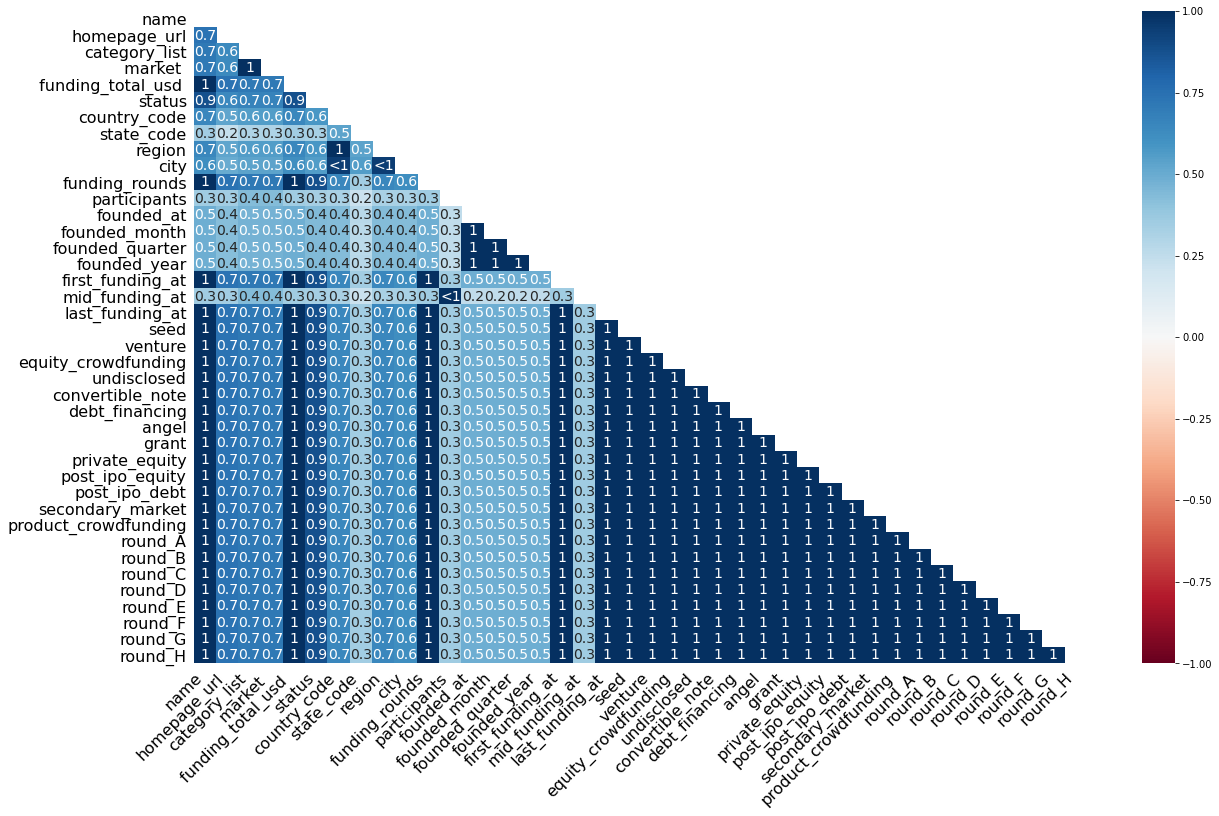

In [8]:
msno.heatmap(df)

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
 ### Промежуточный вывод

Вывод о полученных данных:
    
Были загружены данные ......

Они содержат 39 столбцов и 54294 строк, которые содержат информацию о компаниях и состоявшемся финансировании.

При первичном знакомстве с данными и их предобработкой получили такие результаты:

В всех столбцах были обнаружены пропущенные значения.

Используются неверные типы данных в столбцax: 

- 'funding_total_usd'- object, 
- 'founded_at'-object, 
- 'founded_month' - object ,
- 'founded_quarter' - object, 
- 'founded_year' - float64,
- 'first_funding_at' - object ,
- 'mid_funding_at' - object ,
- 'last_funding_at'- object ,
- 'participants'- float64,
- 'funding_rounds'- float64 


Также загружены данные   

Они содержат 14 столбцов и 15 строк, в которых содержится информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов.

При первичном знакомстве с данными и их предобработкой получили такие результаты:

Во всех столбцах не были обнаружены пропущенные значения.

Используются не очень удобный тип данных в столбце 'year'- int64..... </div>    


### 1.2. Предобработка данных

In [9]:
print(df.columns)

Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [10]:
# для удаления пробелов в названиях столбцов 
#df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.strip()

In [11]:
print(df.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [12]:
# Замена некорректных значений на NaN
# df['funding_total_usd'] = df['funding_total_usd'].replace(' - ', pd.NA)
df['funding_total_usd'] = pd.to_numeric(
df['funding_total_usd'].str.replace(',', '', regex=False),
errors='coerce')


# Преобразование в строку и удаление запятых
#df['funding_total_usd'] = df['funding_total_usd'].astype(str).str.replace(',', '')

# Преобразование в числовой тип, игнорируя ошибки
# df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
#print(df['funding_total_usd'].unique())

In [13]:
#вывести строки DataFrame по индексу
print(df.loc[33041])
print(df.loc[2177])

name                                                    Nubank
homepage_url                        https://www.nubank.com.br/
category_list           |Consumer Internet|Financial Services|
market                                     Financial Services 
funding_total_usd                                   16300000.0
status                                               operating
country_code                                               BRA
state_code                                                 NaN
region                                               Sao Paulo
city                                                 São Paulo
funding_rounds                                             2.0
participants                                               NaN
founded_at                                          2013-01-01
founded_month                                          2013-01
founded_quarter                                        2013-Q1
founded_year                                           

In [14]:
df.loc[33041, 'first_funding_at'] = '2013-05-07'
df.loc[2177, 'first_funding_at'] = '2011-11-14'

In [15]:
print(df.loc[33041])
print(df.loc[2177])

name                                                    Nubank
homepage_url                        https://www.nubank.com.br/
category_list           |Consumer Internet|Financial Services|
market                                     Financial Services 
funding_total_usd                                   16300000.0
status                                               operating
country_code                                               BRA
state_code                                                 NaN
region                                               Sao Paulo
city                                                 São Paulo
funding_rounds                                             2.0
participants                                               NaN
founded_at                                          2013-01-01
founded_month                                          2013-01
founded_quarter                                        2013-Q1
founded_year                                           

In [16]:
for column in ['founded_at', 'founded_month', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    df[column] = pd.to_datetime(df[column], errors='coerce', format='%Y-%m-%d')


In [17]:
parse_dates=['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

In [18]:
for column in ['founded_at', 'founded_month', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    print(df[column].unique())

[                          'NaT' '1785-01-01T00:00:00.000000000'
 '1802-07-19T00:00:00.000000000' ... '2014-11-26T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2014-12-13T00:00:00.000000000']
[                          'NaT' '1902-01-01T00:00:00.000000000'
 '1903-01-01T00:00:00.000000000' '1905-01-01T00:00:00.000000000'
 '1906-01-01T00:00:00.000000000' '1907-01-01T00:00:00.000000000'
 '1908-01-01T00:00:00.000000000' '1910-01-01T00:00:00.000000000'
 '1911-01-01T00:00:00.000000000' '1912-01-01T00:00:00.000000000'
 '1912-04-01T00:00:00.000000000' '1913-01-01T00:00:00.000000000'
 '1914-01-01T00:00:00.000000000' '1917-01-01T00:00:00.000000000'
 '1918-01-01T00:00:00.000000000' '1919-01-01T00:00:00.000000000'
 '1919-06-01T00:00:00.000000000' '1920-01-01T00:00:00.000000000'
 '1921-01-01T00:00:00.000000000' '1921-03-01T00:00:00.000000000'
 '1922-01-01T00:00:00.000000000' '1922-07-01T00:00:00.000000000'
 '1923-01-01T00:00:00.000000000' '1924-01-01T00:00:00.000000000'
 '1924-12-01T00:00:0

In [21]:
print(df['founded_year'].unique())

[1636. 1785. 1802. 1817. 1826. 1831. 1834. 1838. 1840. 1845. 1847. 1850.
 1853. 1854. 1855. 1856. 1857. 1859. 1860. 1861. 1862. 1863. 1864. 1865.
 1869. 1870. 1871. 1872. 1873. 1879. 1881. 1883. 1884. 1885. 1886. 1887.
 1888. 1889. 1890. 1891. 1892. 1895. 1896. 1897. 1898. 1900. 1902. 1903.
 1905. 1906. 1907. 1908. 1910. 1911. 1912. 1913. 1914. 1917. 1918. 1919.
 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1928. 1929. 1930. 1933. 1934.
 1936. 1937. 1938. 1939. 1941. 1943. 1944. 1945. 1946. 1947. 1948. 1949.
 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014.   nan]


In [22]:
print(df['founded_year'].min())
print(df['founded_year'].max())

1636.0
2014.0


In [23]:
df['founded_year'] = pd.to_datetime(df['founded_year'], errors='coerce', format='%Y')
print(df['founded_year'].unique())

[                          'NaT' '1785-01-01T00:00:00.000000000'
 '1802-01-01T00:00:00.000000000' '1817-01-01T00:00:00.000000000'
 '1826-01-01T00:00:00.000000000' '1831-01-01T00:00:00.000000000'
 '1834-01-01T00:00:00.000000000' '1838-01-01T00:00:00.000000000'
 '1840-01-01T00:00:00.000000000' '1845-01-01T00:00:00.000000000'
 '1847-01-01T00:00:00.000000000' '1850-01-01T00:00:00.000000000'
 '1853-01-01T00:00:00.000000000' '1854-01-01T00:00:00.000000000'
 '1855-01-01T00:00:00.000000000' '1856-01-01T00:00:00.000000000'
 '1857-01-01T00:00:00.000000000' '1859-01-01T00:00:00.000000000'
 '1860-01-01T00:00:00.000000000' '1861-01-01T00:00:00.000000000'
 '1862-01-01T00:00:00.000000000' '1863-01-01T00:00:00.000000000'
 '1864-01-01T00:00:00.000000000' '1865-01-01T00:00:00.000000000'
 '1869-01-01T00:00:00.000000000' '1870-01-01T00:00:00.000000000'
 '1871-01-01T00:00:00.000000000' '1872-01-01T00:00:00.000000000'
 '1873-01-01T00:00:00.000000000' '1879-01-01T00:00:00.000000000'
 '1881-01-01T00:00:00.000

In [24]:
# Проверяем типы данных
print('Проверим типы данных датафрейма df:')
print(df.dtypes)

Проверим типы данных датафрейма df:
name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
participants                   float64
founded_at              datetime64[ns]
founded_month           datetime64[ns]
founded_quarter                 object
founded_year            datetime64[ns]
first_funding_at        datetime64[ns]
mid_funding_at          datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing              

In [25]:
# делаем осмотр значений, ведь могут быть опечатки или похожего рода ошибки.
for column in ['founded_year','founded_at', 'founded_month', 'founded_quarter', 'first_funding_at', 'mid_funding_at','last_funding_at' ]:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()


Уникальные значения в столбце founded_year:
['1785-01-01T00:00:00.000000000' '1802-01-01T00:00:00.000000000'
 '1817-01-01T00:00:00.000000000' '1826-01-01T00:00:00.000000000'
 '1831-01-01T00:00:00.000000000' '1834-01-01T00:00:00.000000000'
 '1838-01-01T00:00:00.000000000' '1840-01-01T00:00:00.000000000'
 '1845-01-01T00:00:00.000000000' '1847-01-01T00:00:00.000000000'
 '1850-01-01T00:00:00.000000000' '1853-01-01T00:00:00.000000000'
 '1854-01-01T00:00:00.000000000' '1855-01-01T00:00:00.000000000'
 '1856-01-01T00:00:00.000000000' '1857-01-01T00:00:00.000000000'
 '1859-01-01T00:00:00.000000000' '1860-01-01T00:00:00.000000000'
 '1861-01-01T00:00:00.000000000' '1862-01-01T00:00:00.000000000'
 '1863-01-01T00:00:00.000000000' '1864-01-01T00:00:00.000000000'
 '1865-01-01T00:00:00.000000000' '1869-01-01T00:00:00.000000000'
 '1870-01-01T00:00:00.000000000' '1871-01-01T00:00:00.000000000'
 '1872-01-01T00:00:00.000000000' '1873-01-01T00:00:00.000000000'
 '1879-01-01T00:00:00.000000000' '1881-01-01T0

In [29]:
df_2

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.00,0.20,0.00
2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.00,0.46,0.00
2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.00,0.06,0.00
2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.00,0.08,0.00
2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.00,0.55,0.00
2005,26.60,2628.92,0.00,9.51,0.02,35.09,31.06,0.0,2.40,3.51,0.00,0.05,0.00
2006,61.81,3100.18,0.19,46.74,1.78,113.21,47.75,0.0,16.67,20.58,0.00,0.12,0.00
2007,70.41,3585.37,0.01,55.37,3.22,125.68,164.51,0.0,88.81,24.36,0.00,0.57,0.00
2008,89.72,2717.02,0.03,41.02,1.71,397.54,102.83,0.0,130.38,84.28,0.00,0.47,0.00


In [30]:
# Проверяем типы данных
df_2.dtypes

seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
dtype: object

In [32]:
df_2.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [33]:
# Список всех текстовых столбцов
text_columns = ['name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']

# Проходим по каждому столбцу и заполняем пропуски
for column in text_columns:
    df[column] = df[column].fillna('unknown') 

In [34]:
def process_column(column):
    return column.str.lower().str.replace(" ", "").str.strip()

# Применяем функцию к нужным столбцам
columns_to_process = ['name', 'category_list', 'market', 'region', 'city']
df[columns_to_process] = df[columns_to_process].apply(process_column)

In [35]:
# Список столбцов, в которых нужно заполнить пропуски
columns_to_fill = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'funding_rounds', 'participants']

# Заполняем пропуски нулями
for column in columns_to_fill:
    df[column] = df[column].fillna(0)

In [36]:
# эффективно удалять пробелы в указанных столбцах датафрейма
def strip_columns(df, columns):
    for column in columns:
        df[column] = df[column].str.strip()
    return df

# Список столбцов, которые нужно обработать
columns_to_strip = ['name', 'category_list', 'market', 'region', 'city']

# Применяем функцию к датафрейму
df = strip_columns(df, columns_to_strip)

In [37]:
# Передаём методу rename() словарь с названиями столбцов
df = df.rename(columns={'round_A': 'round_a',
                        'round_B': 'round_b',
                        'round_C': 'round_c',
                        'round_D': 'round_d',
                        'round_E': 'round_e',
                        'round_F': 'round_f',
                        'round_G': 'round_g',                  
                        'round_H': 'round_h'})

# Выводим названия столбцов датафрейма
print(df.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')


In [38]:
# Приводим названия столбцов к snake case
for column in columns_to_process:
    if column in df.columns:
        df[column] = df[column].str.lower().str.replace(' ', '_')
# Список столбцов, которые нужно обработать
columns_to_process = ['name', 'category_list', 'market', 'region', 'city']

# Применяем функцию к датафрейму
df = strip_columns(df, columns_to_process)

In [39]:
# Список столбцов, для которых нужно определить количество уникальных значений
columns_to_check = ['name', 'category_list', 'market', 'region', 'city']

# Проходим по каждому столбцу и выводим количество уникальных значений
for column in columns_to_check:
    unique_count = df[column].nunique()
    print(f"Количество уникальных значений в столбце '{column}': {unique_count}")

Количество уникальных значений в столбце 'name': 49286
Количество уникальных значений в столбце 'category_list': 16676
Количество уникальных значений в столбце 'market': 440
Количество уникальных значений в столбце 'region': 1090
Количество уникальных значений в столбце 'city': 4180


In [40]:
# Считаем пропуски 
print(df.isna().sum())

name                        0
homepage_url                0
category_list               0
market                      0
funding_total_usd       13387
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
participants                0
founded_at              15741
founded_month           15812
founded_quarter         15812
founded_year            15741
first_funding_at         4864
mid_funding_at          24006
last_funding_at          4862
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_a                     0
round_b   

In [41]:
# Считаем пропуски 
print(df_2.isna().sum())

seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
dtype: int64


In [42]:
# Считаем пропуски 
print(df.isna().sum())

name                        0
homepage_url                0
category_list               0
market                      0
funding_total_usd       13387
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
participants                0
founded_at              15741
founded_month           15812
founded_quarter         15812
founded_year            15741
first_funding_at         4864
mid_funding_at          24006
last_funding_at          4862
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_a                     0
round_b   

In [43]:
# Подсчитываем количество строк (непустых значений) в столбце 'funding_total_usd'
count = df['funding_total_usd'].count()

print(count)  # Выведет количество непустых значений в столбце

40907


In [44]:
# выведим строки в указанных столбцах
df = df.sort_values(by='funding_total_usd')
print(df['funding_total_usd'])

48817     1.0
38402    14.0
3549     22.0
38541    30.0
36888    50.0
         ... 
54289     NaN
54290     NaN
54291     NaN
54292     NaN
54293     NaN
Name: funding_total_usd, Length: 54294, dtype: float64


In [45]:
# Удаляем строки, где есть NaN в указанных столбцах
df = df.dropna(subset=['funding_total_usd'])

In [47]:
anomalies_1 = df[df['last_funding_at'] < df['first_funding_at']]
print(anomalies_1)

Empty DataFrame
Columns: [name, homepage_url, category_list, market, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, participants, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, mid_funding_at, last_funding_at, seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_a, round_b, round_c, round_d, round_e, round_f, round_g, round_h]
Index: []

[0 rows x 40 columns]


In [48]:
anomalies_2 = df[df['founded_at'] > df['first_funding_at']]
print(anomalies_2[['founded_at', 'first_funding_at']])

      founded_at first_funding_at
36888 2013-11-11       2013-11-09
38197 2014-06-01       2013-10-20
37129 2014-01-01       2013-12-31
38248 2014-06-08       2014-06-05
32270 2012-09-05       2012-08-10
...          ...              ...
9295  2005-02-01       2005-01-01
25928 2011-05-01       2010-12-01
13307 2007-07-01       2007-01-01
16086 2008-11-11       2007-01-01
11491 2006-12-21       2006-03-01

[2129 rows x 2 columns]


In [49]:
# Определяем маску для строк, которые не соответствуют условию аномалий
mask = ~(df['founded_at'] > df['first_funding_at'])

# Применяем маску к датафрейму
df = df[mask]

# Теперь df_no_anomalies содержит строки без аномалий
print(df)

                        name  \
48817           deckworks.co   
38402              miceit.co   
3549                enviance   
38541         themanlymancan   
33420             makercloud   
...                      ...   
295     firstdatacorporation   
1432   chartercommunications   
7074               clearwire   
48499               sberbank   
623    verizoncommunications   

                                            homepage_url  \
48817                                http://deckworks.co   
38402                               http://www.miceit.co   
3549                  http://www.enviance.com/index.aspx   
38541                    http://themanlymancanonline.com   
33420                             http://makercloud.io/#   
...                                                  ...   
295                             http://www.firstdata.com   
1432                              http://www.charter.com   
7074                            http://www.clearwire.com   
48499          

In [50]:
# Сохраняем количество строк до удаления дубликатов
initial_row_count = df.shape[0]

# Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=list(df.columns))

# Удаляем дубликаты
df_no_duplicates = df_sorted.drop_duplicates(subset=['name', 'founded_year', 'funding_total_usd'])

# Сохраняем количество строк после удаления дубликатов
final_row_count = df_no_duplicates.shape[0]

# Выводим результаты
print(f"Количество строк до удаления дубликатов: {initial_row_count}")

print(f"Количество строк после удаления дубликатов: {final_row_count}")

duplicates_removed = initial_row_count - final_row_count

duplicates_share = duplicates_removed / initial_row_count

print(f"Количество удаленных дубликатов: {duplicates_removed}")

print(f"Доля удаленных дубликатов: {duplicates_share:.2%}")

Количество строк до удаления дубликатов: 38778
Количество строк после удаления дубликатов: 38770
Количество удаленных дубликатов: 8
Доля удаленных дубликатов: 0.02%


In [51]:
# Подсчитываем количество строк (непустых значений) в столбце 'funding_total_usd'
count = df_no_duplicates['funding_total_usd'].count()

print(count)  # Выведет количество непустых значений в столбце

38770


In [52]:
# Функция для вычисления середины интервала между двумя датами
def mid_date(row):
    if pd.notnull(row['first_funding_at']) and pd.notnull(row['last_funding_at']):
        return row['first_funding_at'] + (row['last_funding_at'] - row['first_funding_at']) / 2
    else:
        return pd.NaT

# Применяем функцию к каждой строке и заполняем пропуски в столбце mid_funding_at
df_no_duplicates['mid_funding_at'] = df_no_duplicates.apply(mid_date, axis=1)

In [53]:
# Считаем пропуски 
print(df_no_duplicates.isna().sum())

name                       0
homepage_url               0
category_list              0
market                     0
funding_total_usd          0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
funding_rounds             0
participants               0
founded_at              8705
founded_month           8770
founded_quarter         8770
founded_year            8705
first_funding_at           0
mid_funding_at             0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_a                    0
round_b                    0
round_c       

## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования



In [54]:
# Вычисляем разницу между датами
df_no_duplicates['funding_duration_days'] = (df_no_duplicates['last_funding_at'] - df_no_duplicates['first_funding_at']).dt.days
print(df_no_duplicates.head(40))

                    name                         homepage_url  \
31339           #waywire               http://www.waywire.com   
42197  &tvcommunications                http://enjoyandtv.com   
25704   (in)touchnetwork        http://www.InTouchNetwork.com   
37410    -r-ranchandmine                              unknown   
27331       .clubdomains                     http://nic.club/   
39689       .foxnetworks                http://www.dotfox.com   
11795            0-6.com                   http://www.0-6.com   
48424  01gamestechnology               http://www.01games.hk/   
28762         1,2,3listo              http://www.123listo.com   
664        1-800-doctors               http://1800doctors.com   
4990          10-20media            http://www.10-20media.com   
14682          1000corks                 http://1000corks.com   
16344        1000markets           http://www.1000markets.com   
14254    1000museums.com           http://www.1000museums.com   
22767          1001menus 

In [55]:
# Определяем интервалы и метки
bins = [0, 1, 365, np.inf]
labels = ['Единичное финансирование', 'Срок финансирования до года', 'Срок финансирования более года']
# Применяем метод pd.cut()
df_no_duplicates['categorizes'] = pd.cut(df_no_duplicates['funding_duration_days'], bins=bins, labels=labels, right=False)
# Выводим результаты
print(df_no_duplicates[['first_funding_at', 'last_funding_at', 'categorizes']].head()) 

      first_funding_at last_funding_at                  categorizes
31339       2012-06-30      2012-06-30     Единичное финансирование
42197       2010-06-04      2010-09-23  Срок финансирования до года
25704       2011-04-01      2011-04-01     Единичное финансирование
37410       2014-08-17      2014-09-26  Срок финансирования до года
27331       2013-05-31      2013-05-31     Единичное финансирование


Единичное финансирование          23323
Срок финансирования более года    11430
Срок финансирования до года        4017
Name: categorizes, dtype: int64
Единичное финансирование          60.157338
Срок финансирования более года    29.481558
Срок финансирования до года       10.361104
Name: categorizes, dtype: float64


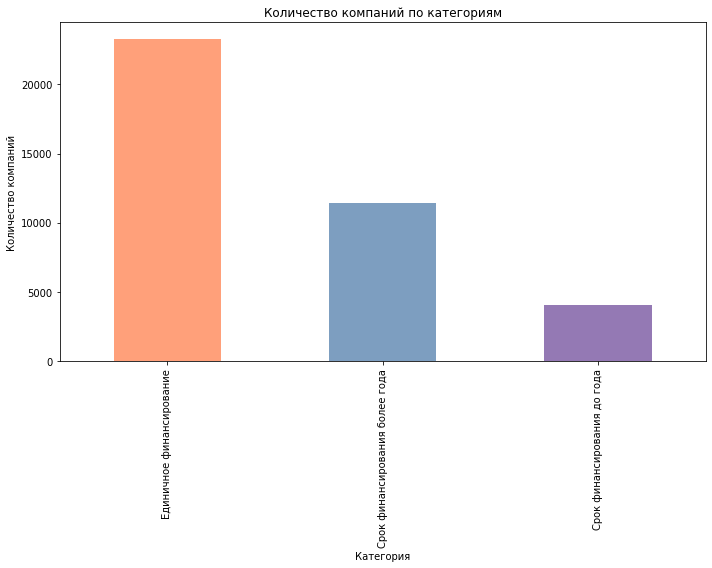

In [56]:
categories_count = df_no_duplicates['categorizes'].value_counts()
print(categories_count)
# Выводим количество компании  по каждой категории

categories_percent = df_no_duplicates['categorizes'].value_counts(normalize=True) * 100
print(categories_percent)
# Выводим проценты по каждой категории


# Определяем цветовую палитру
colors = ['#FFA07A', '#7D9EC0', '#9479B4']

# Создаём фигуру и оси для графиков
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# График по количеству компаний
categories_count.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Количество компаний по категориям')
ax1.set_xlabel('Категория')
ax1.set_ylabel('Количество компаний')

# График по проценту компаний
#categories_percent.plot(kind='bar', ax=ax2, color=colors)
#ax2.set_title('Процент компаний по категориям')
#ax2.set_xlabel('Категория')
#ax2.set_ylabel('Процент от общего числа компаний (%)')

plt.tight_layout()
plt.show()

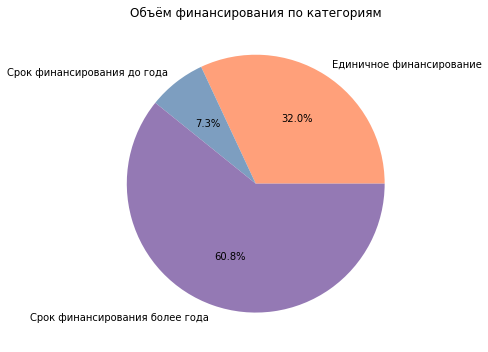

In [57]:
# Группируем данные по категориям и суммируем финансирование
categories_funding = df_no_duplicates.groupby('categorizes')['funding_total_usd'].sum()

# Определяем цветовую палитру
colors = ['#FFA07A', '#7D9EC0', '#9479B4']

# Создаём фигуру и оси для графика
fig, ax1 = plt.subplots(figsize=(12, 5))

# График pie
ax1.pie(categories_funding, labels=categories_funding.index, colors=colors, autopct='%1.1f%%')
ax1.set_title('Объём финансирования по категориям')

plt.tight_layout()
plt.show()
 

### 2.2 Выделение средних и нишевых сегментов рынка

In [58]:
distribution = df_no_duplicates['market'].value_counts()

In [59]:
distribution

software               4624
biotechnology          3560
unknown                2442
mobile                 2194
e-commerce             1727
                       ... 
mobiledevices             1
riskmanagement            1
animalfeed                1
procurement               1
internetradiomarket       1
Name: market, Length: 393, dtype: int64

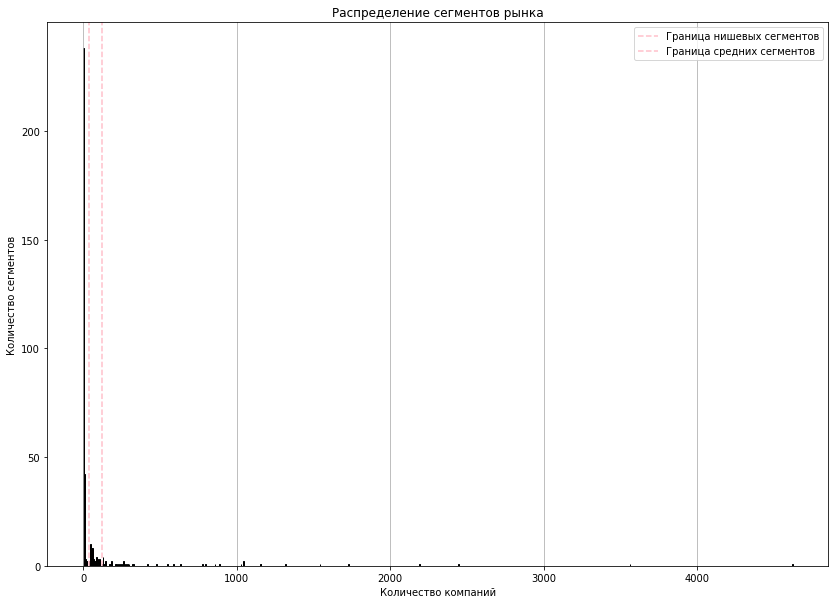

In [60]:
# Определяем бины вручную или с помощью NumPy
bins = np.arange(-5, 4626, 5)

# Создаем фигуру большего размера
plt.figure(figsize=(14, 10))  # Размеры в дюймах

distribution.hist(bins=bins, edgecolor='black')  # Уточняем диапазон бинов и добавляем обводку для лучшей видимости
plt.axvline(35, color='pink', linestyle='--', label='Граница нишевых сегментов')  # Добавляем стиль линии и подпись
plt.axvline(120, color='pink', linestyle='--', label='Граница средних сегментов')  # Добавляем стиль линии и подпись
plt.legend(loc='upper right')  # Указываем расположение легенды
plt.title('Распределение сегментов рынка')  # Добавляем заголовок
plt.xlabel('Количество компаний')  # Ось X
plt.ylabel('Количество сегментов')  # Ось Y
plt.grid(axis='y', alpha=0.75)  # Добавляем сетку для лучшей читаемости
plt.show()
 

In [61]:
# Подсчитываем количество компаний в каждом сегменте рынка
segment_counts = df_no_duplicates['market'].value_counts()

#Инициализируем счетчики для категорий сегментов
massive_count = 0
medium_count = 0
niche_count = 0

for count in segment_counts:
    if count > 120:
        massive_count += 1
    elif 35 <= count <= 120:
        medium_count += 1
    else:
        niche_count += 1

# Выводим результаты
print(f"Массовые сегменты: {massive_count}")
print(f"Средние сегменты: {medium_count}")
print(f"Нишевые сегменты: {niche_count}")

Массовые сегменты: 49
Средние сегменты: 57
Нишевые сегменты: 287


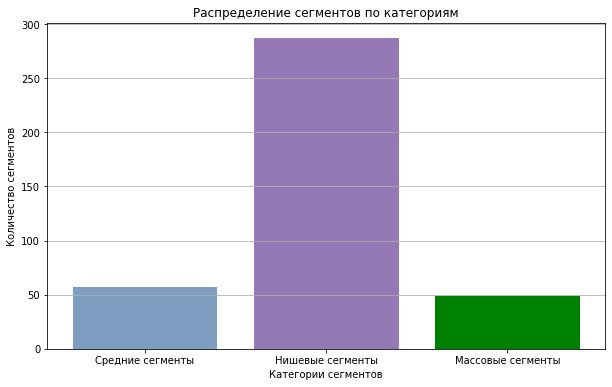

In [62]:
# Создаём данные для графика, исключая массовые сегменты
data = {
    'Средние сегменты': medium_count,
    'Нишевые сегменты': niche_count,
    'Массовые сегменты': massive_count
}

# Рисуем график
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color=['#7D9EC0', '#9479B4', 'green'])
plt.title('Распределение сегментов по категориям')
plt.xlabel('Категории сегментов')
plt.ylabel('Количество сегментов')
plt.grid(axis='y')
plt.show()

В датасете всего:
Массовые сегменты: 49
Средние сегменты: 57
Нишевые сегменты: 289

In [63]:
# Заменяем значения в столбце 'market' на заглушки в зависимости от количества компаний в сегменте
df_no_duplicates['market'] = df_no_duplicates['market'].apply(lambda x: 'niche' if segment_counts[x] < 35 
                                                              else ('mid' if 35 <= segment_counts[x] <= 120 else x))

market_count_m = df_no_duplicates['market'].value_counts()
print(market_count_m)
 

software              4624
biotechnology         3560
mid                   3544
unknown               2442
mobile                2194
e-commerce            1727
curatedweb            1540
enterprisesoftware    1315
healthcare            1159
cleantechnology       1152
hardware+software     1044
games                 1041
advertising           1027
socialmedia            887
healthandwellness      855
education              799
niche                  798
finance                779
analytics              633
manufacturing          585
security               549
semiconductors         479
webhosting             415
consulting             329
hospitality            318
travel                 296
fashion                289
news                   274
realestate             264
messaging              262
search                 259
saas                   252
music                  241
technology             225
internet               217
apps                   208
sports                 183
p

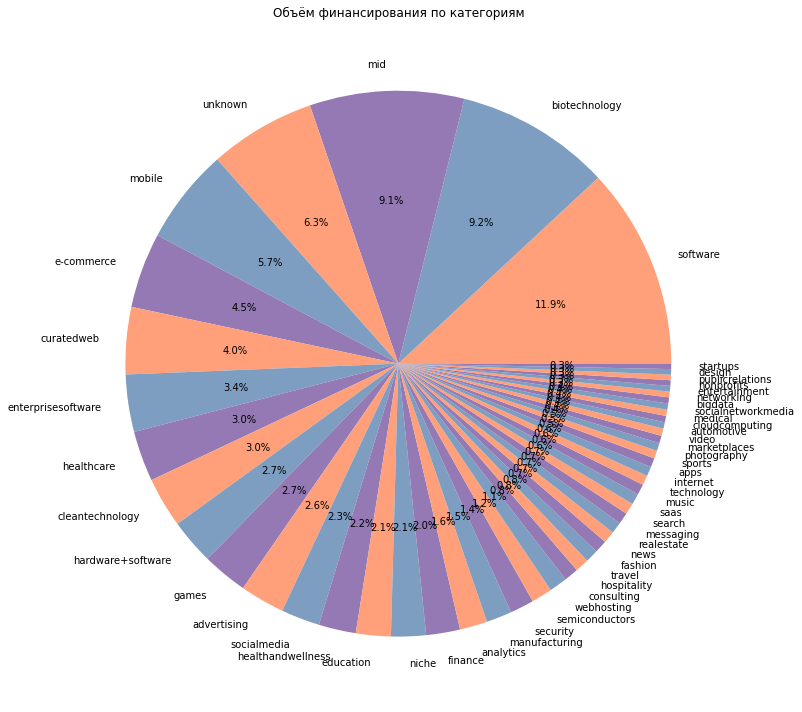

In [64]:
# Группируем данные по категориям и суммируем финансирование
categories_count = df_no_duplicates['market'].value_counts()

# Определяем цветовую палитру
colors = ['#FFA07A', '#7D9EC0', '#9479B4']

# Создаём фигуру и оси для графика
fig, ax1 = plt.subplots(figsize=(18, 10))

# График pie
ax1.pie(categories_count, labels=categories_count.index, colors=colors, autopct='%1.1f%%')
ax1.set_title('Объём финансирования по категориям')

plt.tight_layout()
plt.show()
 

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов



In [65]:
df_no_duplicates['funding_total_usd']=df_no_duplicates['funding_total_usd'] / 1000000

In [66]:
print(df_no_duplicates['funding_total_usd'].head())

31339    1.75
42197    4.00
25704    1.50
37410    0.06
27331    7.00
Name: funding_total_usd, dtype: float64


In [67]:
print(df_no_duplicates['funding_total_usd'].describe())

count    38770.000000
mean        16.137860
std        172.758495
min          0.000001
25%          0.390000
50%          2.000000
75%         10.000000
max      30079.503000
Name: funding_total_usd, dtype: float64


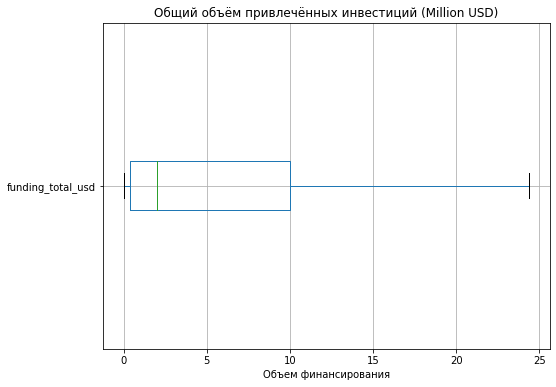

In [68]:
# Строим диаграмму размаха методом boxplot()
boxplot = df_no_duplicates.boxplot(column='funding_total_usd',
    vert=False, 
    showfliers=False,                              
    figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Общий объём привлечённых инвестиций (Million USD)')

boxplot.set_xlabel('Объем финансирования')

plt.show()

In [69]:
# Получим список уникальных категорий
markets = df_no_duplicates['market'].unique()
df_no_duplicates['anomaly'] = False

# Пройдем по каждой категории и найдем аномалии по методу IQR
for market_type in markets:
    market_data = df_no_duplicates[df_no_duplicates['market'] == market_type]
    q1 = market_data['funding_total_usd'].quantile(0.25)
    q3 = market_data['funding_total_usd'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 2 * iqr
    upper = q3 + 2 * iqr
    df_no_duplicates.loc[((df_no_duplicates['funding_total_usd'] > upper) | 
            (df_no_duplicates['funding_total_usd'] < lower)) & 
            (df_no_duplicates['market'] == market_type)
            , 'anomaly'] = True

In [70]:
print(df_no_duplicates['anomaly'].sum())

4110


In [71]:
df_no_duplicates[df_no_duplicates['anomaly'] == True][['market', 'anomaly']]

,market,anomaly
4277,software,True
27291,niche,True
11799,manufacturing,True
7477,travel,True
1206,software,True
...,...,...
11349,curatedweb,True
11793,software,True
9332,entertainment,True
23248,music,True


In [72]:
print(df_no_duplicates['anomaly'].mean())

0.1060098013928295


In [73]:
grouped_anomalies = df_no_duplicates.groupby('market')['anomaly'].mean()
sorted_grouped_anomalies = grouped_anomalies.sort_values(ascending=False)
print(sorted_grouped_anomalies)
 

market
realestate            0.178030
entertainment         0.162791
search                0.146718
niche                 0.142857
saas                  0.142857
consulting            0.139818
internet              0.138249
networking            0.136364
technology            0.133333
photography           0.132597
apps                  0.129808
marketplaces          0.127907
mid                   0.127540
unknown               0.125717
e-commerce            0.125651
video                 0.125000
music                 0.124481
bigdata               0.122302
startups              0.121951
socialmedia           0.121759
news                  0.120438
travel                0.118243
cleantechnology       0.114583
education             0.113892
socialnetworkmedia    0.111888
design                0.111111
cloudcomputing        0.109589
healthandwellness     0.108772
fashion               0.107266
hospitality           0.106918
mobile                0.105287
medical               0.104895
s

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии



In [74]:
# Фильтруем данные за 2014 год
filtered_data_2014 = df_no_duplicates[df_no_duplicates['last_funding_at'].dt.year >= 2014]

# Группируем данные по месяцам
monthly_breakdown_2014 = filtered_data_2014.groupby(filtered_data_2014['last_funding_at'].dt.to_period('M')).size()
print(monthly_breakdown_2014)

last_funding_at
2014-01    1115
2014-02     905
2014-03    1029
2014-04    1032
2014-05     983
2014-06    1177
2014-07    1220
2014-08    1028
2014-09    1090
2014-10    1096
2014-11     705
2014-12      51
Freq: M, dtype: int64


In [75]:
# Фильтруем данные за 2014 год
filtered_data_2014 = df_no_duplicates[df_no_duplicates['mid_funding_at'].dt.year >= 2014]

# Группируем данные по месяцам
monthly_breakdown_2014 = filtered_data_2014.groupby(filtered_data_2014['mid_funding_at'].dt.to_period('M')).size()
print(monthly_breakdown_2014)

mid_funding_at
2014-01    890
2014-02    703
2014-03    775
2014-04    731
2014-05    627
2014-06    746
2014-07    704
2014-08    566
2014-09    550
2014-10    499
2014-11    315
2014-12     23
Freq: M, dtype: int64


In [76]:
# Фильтруем данные за 2014 год
filtered_data_2014 = df_no_duplicates[df_no_duplicates['founded_at'].dt.year >= 2014]

# Группируем данные по месяцам
monthly_breakdown_2014 = filtered_data_2014.groupby(filtered_data_2014['founded_at'].dt.to_period('M')).size()
print(monthly_breakdown_2014)

founded_at
2014-01    359
2014-02     91
2014-03     85
2014-04     80
2014-05     61
2014-06     47
2014-07     32
2014-08     20
2014-09     18
2014-10     10
2014-11      2
2014-12      1
Freq: M, dtype: int64


In [77]:
# Фильтруем данные за 2014 год
filtered_data_2014 = df_no_duplicates[df_no_duplicates['first_funding_at'].dt.year >= 2014]

# Группируем данные по месяцам
monthly_breakdown_2014 = filtered_data_2014.groupby(filtered_data_2014['first_funding_at'].dt.to_period('M')).size()
print(monthly_breakdown_2014)

first_funding_at
2014-01    779
2014-02    618
2014-03    641
2014-04    586
2014-05    535
2014-06    660
2014-07    667
2014-08    522
2014-09    534
2014-10    489
2014-11    311
2014-12     23
Freq: M, dtype: int64


In [78]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38770 entries, 31339 to 9823
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   38770 non-null  object        
 1   homepage_url           38770 non-null  object        
 2   category_list          38770 non-null  object        
 3   market                 38770 non-null  object        
 4   funding_total_usd      38770 non-null  float64       
 5   status                 38770 non-null  object        
 6   country_code           38770 non-null  object        
 7   state_code             38770 non-null  object        
 8   region                 38770 non-null  object        
 9   city                   38770 non-null  object        
 10  funding_rounds         38770 non-null  float64       
 11  participants           38770 non-null  float64       
 12  founded_at             30065 non-null  datetime64[ns]
 13

In [79]:
#Сгруппируем данные по годам и подсчитаем количество раундов финансирования в каждом году
df_no_duplicates['year'] = df_no_duplicates['mid_funding_at'].dt.year
grouped = df_no_duplicates.groupby('year')['funding_rounds'].count()
print(grouped)

year
1921       1
1960       1
1979       1
1982       3
1983       2
1985       3
1987       2
1989       1
1992       3
1993       1
1994       1
1995       2
1997       6
1998      10
1999      33
2000      68
2001      57
2002      50
2003      67
2004     116
2005     753
2006    1198
2007    1540
2008    1958
2009    2887
2010    3895
2011    4676
2012    6198
2013    8108
2014    7129
Name: funding_rounds, dtype: int64


In [80]:
df_filtered = df_no_duplicates[df_no_duplicates['anomaly'] == False]

In [81]:
df_final = df_filtered[(df_filtered['year'] >= 2000)]
print(df_final.head(40))

                    name                         homepage_url  \
31339           #waywire               http://www.waywire.com   
42197  &tvcommunications                http://enjoyandtv.com   
25704   (in)touchnetwork        http://www.InTouchNetwork.com   
37410    -r-ranchandmine                              unknown   
27331       .clubdomains                     http://nic.club/   
39689       .foxnetworks                http://www.dotfox.com   
11795            0-6.com                   http://www.0-6.com   
48424  01gamestechnology               http://www.01games.hk/   
28762         1,2,3listo              http://www.123listo.com   
664        1-800-doctors               http://1800doctors.com   
4990          10-20media            http://www.10-20media.com   
14682          1000corks                 http://1000corks.com   
16344        1000markets           http://www.1000markets.com   
14254    1000museums.com           http://www.1000museums.com   
22767          1001menus 

In [82]:
df_final['year'] = df_final['mid_funding_at'].dt.year
grouped = df_final.groupby('market')['funding_rounds'].count()
print(grouped)

market
advertising            931
analytics              572
apps                   181
automotive             133
bigdata                122
biotechnology         3258
cleantechnology       1020
cloudcomputing         130
consulting             280
curatedweb            1381
design                 112
e-commerce            1506
education              706
enterprisesoftware    1202
entertainment          108
fashion                258
finance                702
games                  958
hardware+software      941
healthandwellness      762
healthcare            1065
hospitality            284
internet               187
manufacturing          540
marketplaces           150
medical                128
messaging              238
mid                   3087
mobile                1959
music                  211
networking             114
news                   241
niche                  684
nonprofits             119
photography            156
publicrelations        116
realestate           

<div class="alert alert-info"> <b>Комментарии студентаV2:</b>  
  Из датасета для дальнейшего исследования исключили по столбцу 'anomaly' строки с аномальные значения финансирования. Исключили строки, в какие года было зафиксировано менее 50 раундов финансирования, т.е. взяли для дальнейшего исследования период с 2000. 
    
Данные за 2014 год были не полными, удалять не стала Значения за 2014 год требуются к задаче  4.2 "Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов. "Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования funding_total_usd по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013"  график, цифра
    
    
[Ссылка номер один](#link1)



.. </div>

In [83]:
print(df_final['year'])

31339    2012
42197    2010
25704    2011
37410    2014
27331    2013
         ... 
12647    2013
34747    2014
44606    2012
17726    2014
9823     2006
Name: year, Length: 34603, dtype: int64


### 3.3. Анализ типов финансирования по объёму и популярности



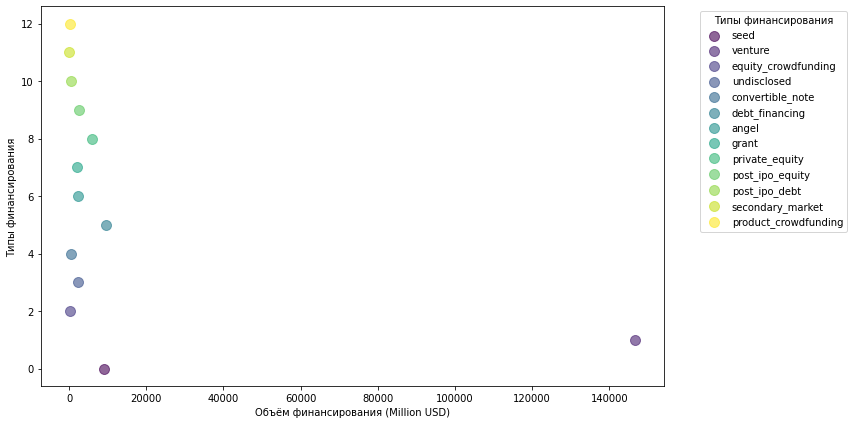

In [84]:
types_of_financing = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                      'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                      'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Суммируем значения по каждому типу финансирования
# Суммируем значения по каждому типу финансирования
total_funding = df_final[types_of_financing].sum()
total_per_type_millions = total_funding / 1000000

# Создаём один график scatter
fig, ax = plt.subplots(figsize=(12, 6))  # Увеличенный размер фигуры

# Определяем цветовую палитру
colors = plt.cm.viridis(np.linspace(0, 1, len(types_of_financing)))

for i, type in enumerate(types_of_financing):
    ax.scatter(total_per_type_millions[type], i, s=100, alpha=0.6, color=colors[i], label=type)

ax.set_xlabel('Объём финансирования (Million USD)')
ax.set_ylabel('Типы финансирования')  # Подпись для оси Y
ax.legend(title='Типы финансирования', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Для лучшего расположения графиков
plt.show()

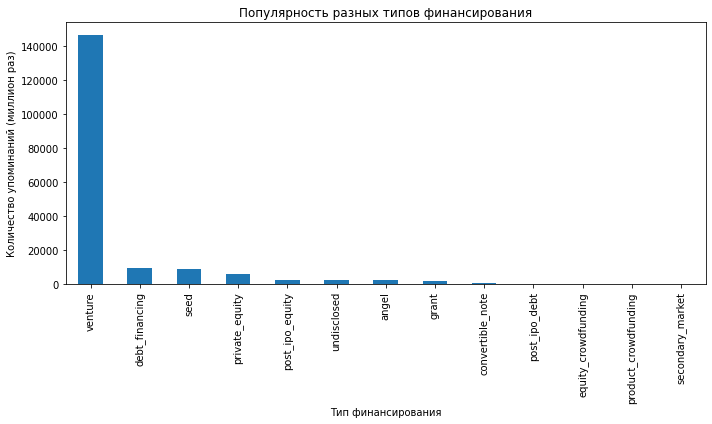

In [85]:
# Список типов финансирования
funding_types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Подсчитываем количество упоминаний каждого типа финансирования и преобразуем в тысячи
count_per_type = df_final[funding_types].sum(min_count=1) / 1000000

# Сортируем типы финансирования по убыванию количества упоминаний
sorted_count = count_per_type.sort_values(ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
sorted_count.plot(kind='bar')
plt.title('Популярность разных типов финансирования')
plt.xlabel('Тип финансирования')
plt.ylabel('Количество упоминаний (миллион раз)')
plt.tight_layout()
plt.show()

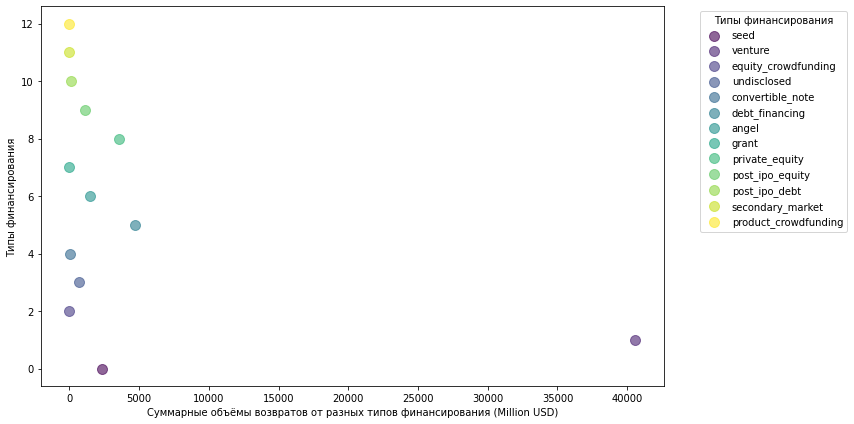

In [86]:
types_of_financing = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                      'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                      'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Суммируем значения по каждому типу финансирования
total_returns_per_type = df_2[types_of_financing].sum()

# Создаём один график scatter
fig, ax = plt.subplots(figsize=(12, 6))  # Увеличенный размер фигуры

# Определяем цветовую палитру
colors = plt.cm.viridis(np.linspace(0, 1, len(types_of_financing)))

for i, type in enumerate(types_of_financing):
    ax.scatter(total_returns_per_type[type], i, s=100, alpha=0.6, color=colors[i], label=type)

ax.set_xlabel('Суммарные объёмы возвратов от разных типов финансирования (Million USD)')
ax.set_ylabel('Типы финансирования')  # Подпись для оси Y
ax.legend(title='Типы финансирования', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Для лучшего расположения графиков
plt.show()

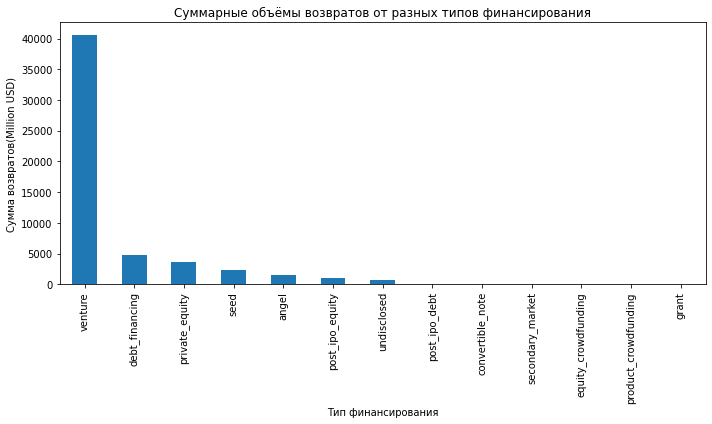

In [87]:
# Список типов финансирования
funding_types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Подсчитываем суммарные объёмы возвратов по каждому типу финансирования
total_returns_per_type = df_2[funding_types].sum()

# Сортируем типы финансирования по убыванию суммы возвратов
sorted_returns = total_returns_per_type.sort_values(ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
sorted_returns.plot(kind='bar')
plt.title('Суммарные объёмы возвратов от разных типов финансирования')
plt.xlabel('Тип финансирования')
plt.ylabel('Сумма возвратов(Million USD)')
plt.tight_layout()
plt.show()

<div class="alert alert-info"> <b>Комментарии студентаV3:</b>  
 Тип финансирования - 'venture' популярное и крупное, большие возвраты,  в отличие от Grant/Angel. 
    
seed - очень популярный но относительно малообъёмный. Grant - нулевые возвраты ( что логично так как такой тип финансирования не предполагает что ты возвращаешь деньги которые получил)
 </div>

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам



In [88]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34603 entries, 31339 to 9823
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   34603 non-null  object        
 1   homepage_url           34603 non-null  object        
 2   category_list          34603 non-null  object        
 3   market                 34603 non-null  object        
 4   funding_total_usd      34603 non-null  float64       
 5   status                 34603 non-null  object        
 6   country_code           34603 non-null  object        
 7   state_code             34603 non-null  object        
 8   region                 34603 non-null  object        
 9   city                   34603 non-null  object        
 10  funding_rounds         34603 non-null  float64       
 11  participants           34603 non-null  float64       
 12  founded_at             26650 non-null  datetime64[ns]
 13

In [89]:
# вычисляем общий средний объём одного раунда финансирования
df_final['average_per_round'] = df_final['funding_total_usd'] / df_final['funding_rounds']

# Группируем данные по годам объем одного раунда для каждого рынка за каждый год
sum_by_market_and_year = df_final.groupby(['year'])['average_per_round'].sum()

# Сортируем и выводим топ-20
top = sum_by_market_and_year.sort_values(ascending=False).head(60)

print(top)

year
2013    16858.814331
2014    16264.971300
2012    13879.828288
2011    12903.593825
2010    12209.602243
2009     9408.689354
2008     8026.943121
2007     6965.496625
2006     6673.785071
2005     4413.576702
2004      555.548496
2000      283.015702
2003      224.869728
2001      215.551475
2002      144.936354
Name: average_per_round, dtype: float64


In [90]:
# Группируем данные по годам и рынкам и вычисляем количество раунд за каждый год
count_by_market_and_year = df_final.groupby(['year'])['funding_rounds'].sum()

# Сортируем и выводим топ-20
top_20 = count_by_market_and_year.sort_values(ascending=False).head(40)
print(top_20)

year
2013    12343.0
2012    10652.0
2014     8206.0
2011     7923.0
2010     5900.0
2009     3979.0
2008     2780.0
2007     2080.0
2006     1488.0
2005      863.0
2004      184.0
2000       86.0
2003       80.0
2001       71.0
2002       61.0
Name: funding_rounds, dtype: float64


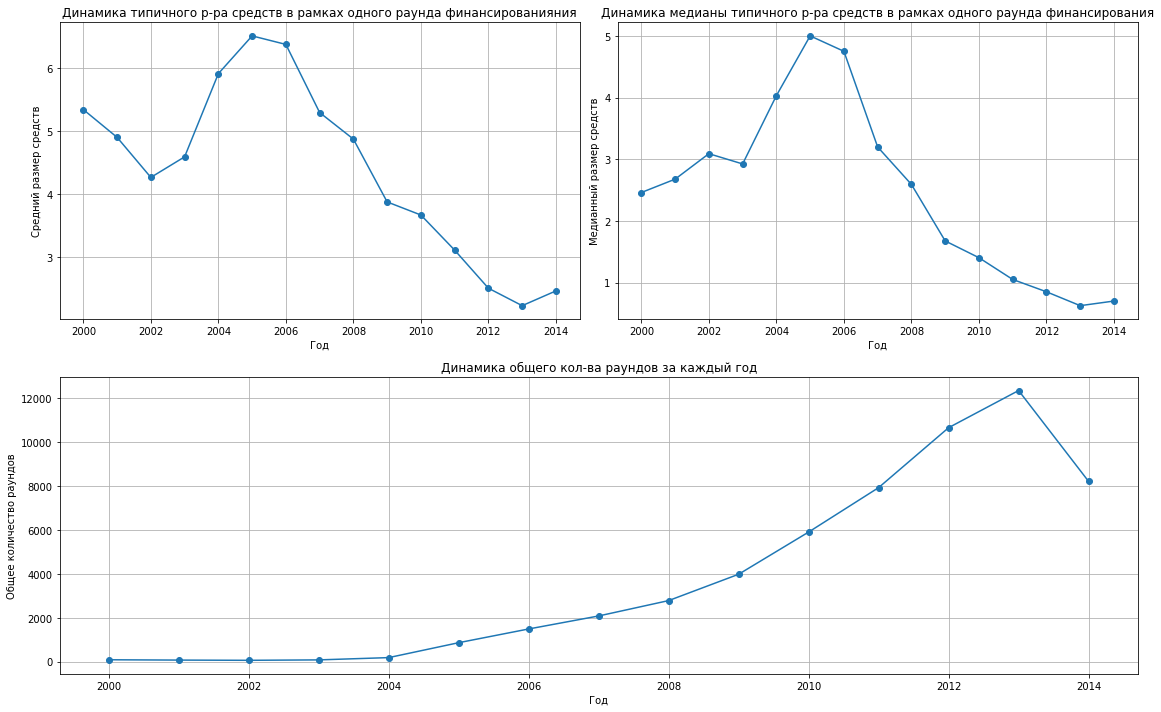

In [91]:
# вычисляем общий средний объём одного раунда финансирования
df_final['average_per_round'] = df_final['funding_total_usd'] / df_final['funding_rounds']

# Группируем данные по годам объём финансирования одного раунда для каждого рынка за каждый год
sum_by_market_and_year = df_final.groupby(['year'])['average_per_round'].mean()

# Вычисляем медиану объёма финансирования одного раунда по годам
median_by_year = df_final.groupby(['year'])['average_per_round'].median()

# Группируем данные по годам и рынкам и вычисляем количество раундов за каждый год
count_by_market_and_year = df_final.groupby(['year'])['funding_rounds'].sum()

# Создаём три графика рядом
plt.figure(figsize=(16, 10))

# Первый график: динамика типичного размера средств
plt.subplot(2, 2, 1)
sum_by_market_and_year.plot(kind='line', marker='o')
plt.title('Динамика типичного р-ра средств в рамках одного раунда финансированияния')
plt.xlabel('Год')
plt.ylabel('Средний размер средств')
plt.grid(True)

# Второй график: динамика медианы объёма одного раунда
plt.subplot(2, 2, 2)
median_by_year.plot(kind='line', marker='o')
plt.title('Динамика медианы типичного р-ра средств в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Медианный размер средств')
plt.grid(True)

# Третий график: динамика общего количества раундов
plt.subplot(2, 1, 2)
count_by_market_and_year.plot(kind='line', marker='o')
plt.title('Динамика общего кол-ва раундов за каждый год')
plt.xlabel('Год')
plt.ylabel('Общее количество раундов')
plt.grid(True)


plt.tight_layout()
plt.show()

In [92]:
df_final.groupby(['year'])['average_per_round'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,53.0,5.339919,7.338379,0.004000,1.010000,2.460000,7.500000,44.500000
2001,44.0,4.898897,6.439944,0.100000,0.673747,2.676667,5.655000,22.900000
2002,34.0,4.262834,4.050984,0.200000,0.625000,3.089717,6.705000,14.000000
2003,49.0,4.589178,5.255734,0.010000,0.673150,2.923307,6.450000,20.000000
2004,94.0,5.910090,6.941814,0.030214,1.625000,4.031400,8.383333,52.065215
2005,678.0,6.509700,6.511063,0.001000,2.000000,5.000000,9.000000,54.000000
2006,1047.0,6.374198,6.921184,0.019241,1.500000,4.750000,8.615000,82.000000
2007,1316.0,5.292931,6.805751,0.001875,1.000000,3.198160,7.005419,65.000000
2008,1648.0,4.870718,7.215539,0.001000,0.750002,2.591032,5.938845,70.000000


<div class="alert alert-info"> <b>Комментарии студентаV5:</b>  

В 2005 году типичный размер средств, собранных в рамках одного раунда, был максимальным.
    
в 2014 году наблюдалось, что по количеству раундов динамика падает, по объему средств финансирования динамика растет.

в 2014 году показатели типичного размера средств, собранных в рамках одного раунда:
mean -2.460661, медиана -  0.7.
   
   
</div>

<a class='anchor' id="link1"></a>

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов



In [93]:
pivot_table = df_final.pivot_table(values='funding_total_usd', index='year', columns='market', aggfunc='sum')
print(pivot_table)

market  advertising   analytics       apps  automotive     bigdata  \
year                                                                 
2000       2.000000    1.200000        NaN         NaN         NaN   
2001      14.998321   10.774916        NaN         NaN         NaN   
2002            NaN    7.500000        NaN         NaN         NaN   
2003      17.000000         NaN        NaN    4.530000         NaN   
2004      46.500000    3.000000        NaN         NaN         NaN   
2005      78.700000   78.371000        NaN   56.282576         NaN   
2006     109.003133  148.949490        NaN   36.460000         NaN   
2007     420.238978   52.818000   1.310600   22.600000    4.100000   
2008     602.649634  220.279699   5.736842   69.233430    1.150000   
2009     718.280882  192.742980   4.200000   56.523117    2.982515   
2010     644.692368  177.749365   8.523468   89.610916   20.050000   
2011     816.162436  500.040081  10.000736   77.942177   26.619158   
2012     697.938486 

In [94]:
#Выбираем сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013
growth_markets = pivot_table.loc[2014] > pivot_table.loc[2013]
growing_segments = pivot_table.columns[growth_markets].tolist()

# Фильтруем сводную таблицу, чтобы оставить только сегменты с ростом
filtered_pivot_table = pivot_table[growing_segments]

print(filtered_pivot_table)

market       apps  automotive     design  entertainment    internet  \
year                                                                  
2000          NaN         NaN        NaN       0.100000   10.000000   
2001          NaN         NaN        NaN            NaN         NaN   
2002          NaN         NaN        NaN            NaN         NaN   
2003          NaN    4.530000        NaN            NaN         NaN   
2004          NaN         NaN        NaN            NaN         NaN   
2005          NaN   56.282576   9.300000      10.000000   12.275000   
2006          NaN   36.460000   0.357000      21.800000         NaN   
2007     1.310600   22.600000  10.800000      15.524025    0.240000   
2008     5.736842   69.233430   0.344302      10.050000   25.346754   
2009     4.200000   56.523117   2.150144      16.100000   21.865773   
2010     8.523468   89.610916   3.069655       1.797608   22.478058   
2011    10.000736   77.942177  18.331825      42.476500   37.628042   
2012  

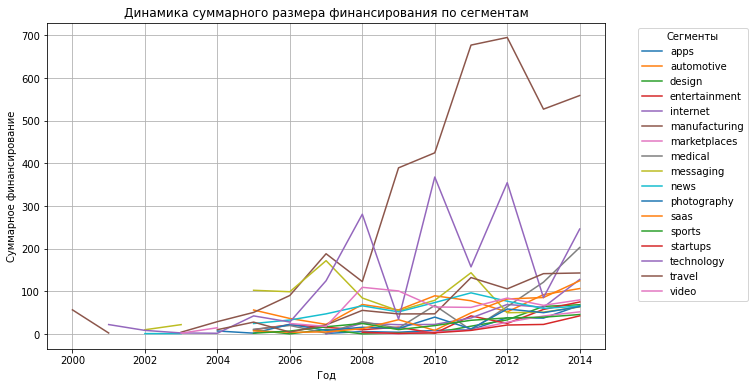

In [95]:
# Выбираем сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013
growth_markets = pivot_table.loc[2014] > pivot_table.loc[2013]
growing_segments = pivot_table.columns[growth_markets].tolist()

# Фильтруем сводную таблицу, чтобы оставить только сегменты с ростом
filtered_pivot_table = pivot_table[growing_segments]

# Исключаем сегменты 'niche' и 'mid'
filtered_pivot_table = filtered_pivot_table.drop(['niche', 'unknown', 'mid'], axis=1, errors='ignore')

# Создаём график
plt.figure(figsize=(10, 6))

# Строим график для каждого сегмента
for segment in filtered_pivot_table.columns:
    plt.plot(filtered_pivot_table.index, filtered_pivot_table[segment], label=segment)

plt.title('Динамика суммарного размера финансирования по сегментам')
plt.xlabel('Год')
plt.ylabel('Суммарное финансирование')
plt.legend(title='Сегменты', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> сегменты manufacturing и technology показывают наиболее быстрый и уверенный рост.  Почему-то на графике отображаются все года, первоначально загружались только 2013 и 2014
  </div>

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

In [96]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2000 to 2014
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   seed                  15 non-null     float64
 1   venture               15 non-null     float64
 2   equity_crowdfunding   15 non-null     float64
 3   undisclosed           15 non-null     float64
 4   convertible_note      15 non-null     float64
 5   debt_financing        15 non-null     float64
 6   angel                 15 non-null     float64
 7   grant                 15 non-null     float64
 8   private_equity        15 non-null     float64
 9   post_ipo_equity       15 non-null     float64
 10  post_ipo_debt         15 non-null     float64
 11  secondary_market      15 non-null     float64
 12  product_crowdfunding  15 non-null     float64
dtypes: float64(13)
memory usage: 1.6 KB


In [97]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34603 entries, 31339 to 9823
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   34603 non-null  object        
 1   homepage_url           34603 non-null  object        
 2   category_list          34603 non-null  object        
 3   market                 34603 non-null  object        
 4   funding_total_usd      34603 non-null  float64       
 5   status                 34603 non-null  object        
 6   country_code           34603 non-null  object        
 7   state_code             34603 non-null  object        
 8   region                 34603 non-null  object        
 9   city                   34603 non-null  object        
 10  funding_rounds         34603 non-null  float64       
 11  participants           34603 non-null  float64       
 12  founded_at             26650 non-null  datetime64[ns]
 13

In [98]:
import numpy as np

investment_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]


returns_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]


investment_pivot = df_final.pivot_table(
    values=investment_types,
    index='year',
    aggfunc='sum'
)

returns_pivot = df_2.pivot_table(
    values=returns_types,
    index='year',
    aggfunc='sum'
)

return_percentage_pivot = (returns_pivot / (investment_pivot/1000000 + 1e-6)) * 100
return_percentage_pivot = return_percentage_pivot[return_percentage_pivot < 200]
print(return_percentage_pivot)  

           angel  convertible_note  debt_financing  equity_crowdfunding  \
year                                                                      
2000   28.438743          0.000000             NaN             0.000000   
2001  111.957327               NaN       85.523793             0.000000   
2002         NaN               NaN             NaN             0.000000   
2003   39.651158               NaN       27.249993             0.000000   
2004  163.837788          0.147801       49.272725             0.000000   
2005   82.106752               NaN       90.827619             0.000000   
2006  101.133207               NaN      122.430090                  NaN   
2007  127.409050         54.412710       59.659866                  NaN   
2008   52.049844         15.314672      106.709277             3.215234   
2009   74.622373          4.496087       54.006045                  NaN   
2010   66.042425          4.100136       38.737362            97.499756   
2011   50.889068         

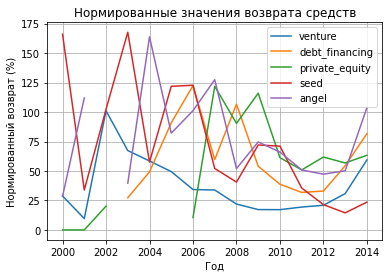

In [99]:

types_to_plot = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

for financing_type in types_to_plot:
    plt.plot(return_percentage_pivot.index, return_percentage_pivot[financing_type], label=financing_type)

plt.title('Нормированные значения возврата средств')
plt.xlabel('Год')
plt.ylabel('Нормированный возврат (%)')
plt.legend()
plt.grid()
plt.show()
 

<div class="alert alert-info"> <b>Комментарии студентаV3:</b> 
    
    
    У типа финансирования - 'angel'  наблюдается периодичный рост показателя.
  
  </div>


## Шаг 5. Итоговый вывод и рекомендации

Итоги проекта:

Были загружены данные ....

Они содержат 14 столбцов и 15 строк, в которых содержится информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов.
    
Были загружены данные  .....

Они содержат 39 столбцов и 54294 строк, которые содержат информацию о компаниях и состоявшемся финансировании.

В всех столбцах были обнаружены пропущенные значения.

В предварительной обработке данных привели значения к формату даты, в загруженном датасете были неверные типы данных в столбцax: 

- 'funding_total_usd'- object, 
- 'founded_at'-object, 
- 'founded_month' - object ,
- 'founded_quarter' - object, 
- 'founded_year' - float64,
- 'first_funding_at' - object ,
- 'mid_funding_at' - object ,
- 'last_funding_at'- object ,
- 'participants'- float64,
- 'funding_rounds'- float64 

Для достижения большей точности при дальнейших расчетах, мы проверели предварительную обработку данных:
нормализация данных с текстовыми значениями.

Было строк -  54294 

Удалены неинформативные строки в столбце 'funding_total_usd' - 13387 (24.6 %)
    
Исключены дубликаты: 8
Доля удаленных дубликатов: 0.2%

Исключили из датафрейма аномальные значения, когда 'founded_at' позже 'first_funding_at' - 2129 строк. 

После обработки осталось 38770 строк.

В датасете данные за 2014 год не полные, не хватает декабря.

Из датасета для дальнейшего исследования исключили компании с аномальными значениями финансирования. 

Исключили года,  когда было зафиксировано менее 50 раундов финансирования (взяли в расчет период с 2000г).   

Большинство сегментов относятся к нишевым. но при этом подавляющее большинство компаний (82,5%) занято в массовых сегментах. То есть массовых сегментов мало, но большинство компаний заняты именно в них.

Массовые сегменты включают популярные отрасли, такие как:software, biotechnology, mobile.

В 2005 году типичный размер средств, собранных в рамках одного раунда, был максимальным.
    
в 2014 году наблюдалось, что по количеству раундов динамика падает, по объему средств финансирования динамика растет.

в 2014 году показатели типичного размера средств, собранных в рамках одного раунда:
mean(среднее знач) -2.460661, Медиана -  0.7.

Тип финансирования - 'venture' популярное и крупное, большие объемы финансирования и большие возвраты, но у типа финансирования - 'angel'  наблюдается периодичный рост нормированного значения возврата.

Было бы целесообразно инвестировать в такие массовые компаниии как - software или biotechnology,  финансированием - 'angel', если бы на дворе был 2015 год.